In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix, classification_report

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
df =  pd.read_csv('data/train_use.csv')

In [3]:
df_encoded = df.copy()

# Aplicar LabelEncoder a todas las variables categóricas
encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

df_encoded.head()

,clase,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,bruises
0,0,2,2,8,0,1,0,0,0,0,...,3,7,7,2,0,3,1,2,0,1
1,0,0,2,7,1,1,0,0,1,0,...,3,7,7,2,0,3,1,2,2,1
2,0,2,2,3,0,1,1,0,0,1,...,3,7,7,2,0,0,1,0,0,0
3,0,2,1,8,0,1,0,0,1,0,...,3,7,7,2,0,3,0,2,0,1
4,0,0,2,7,0,1,0,0,4,0,...,3,7,7,2,0,3,0,2,2,1


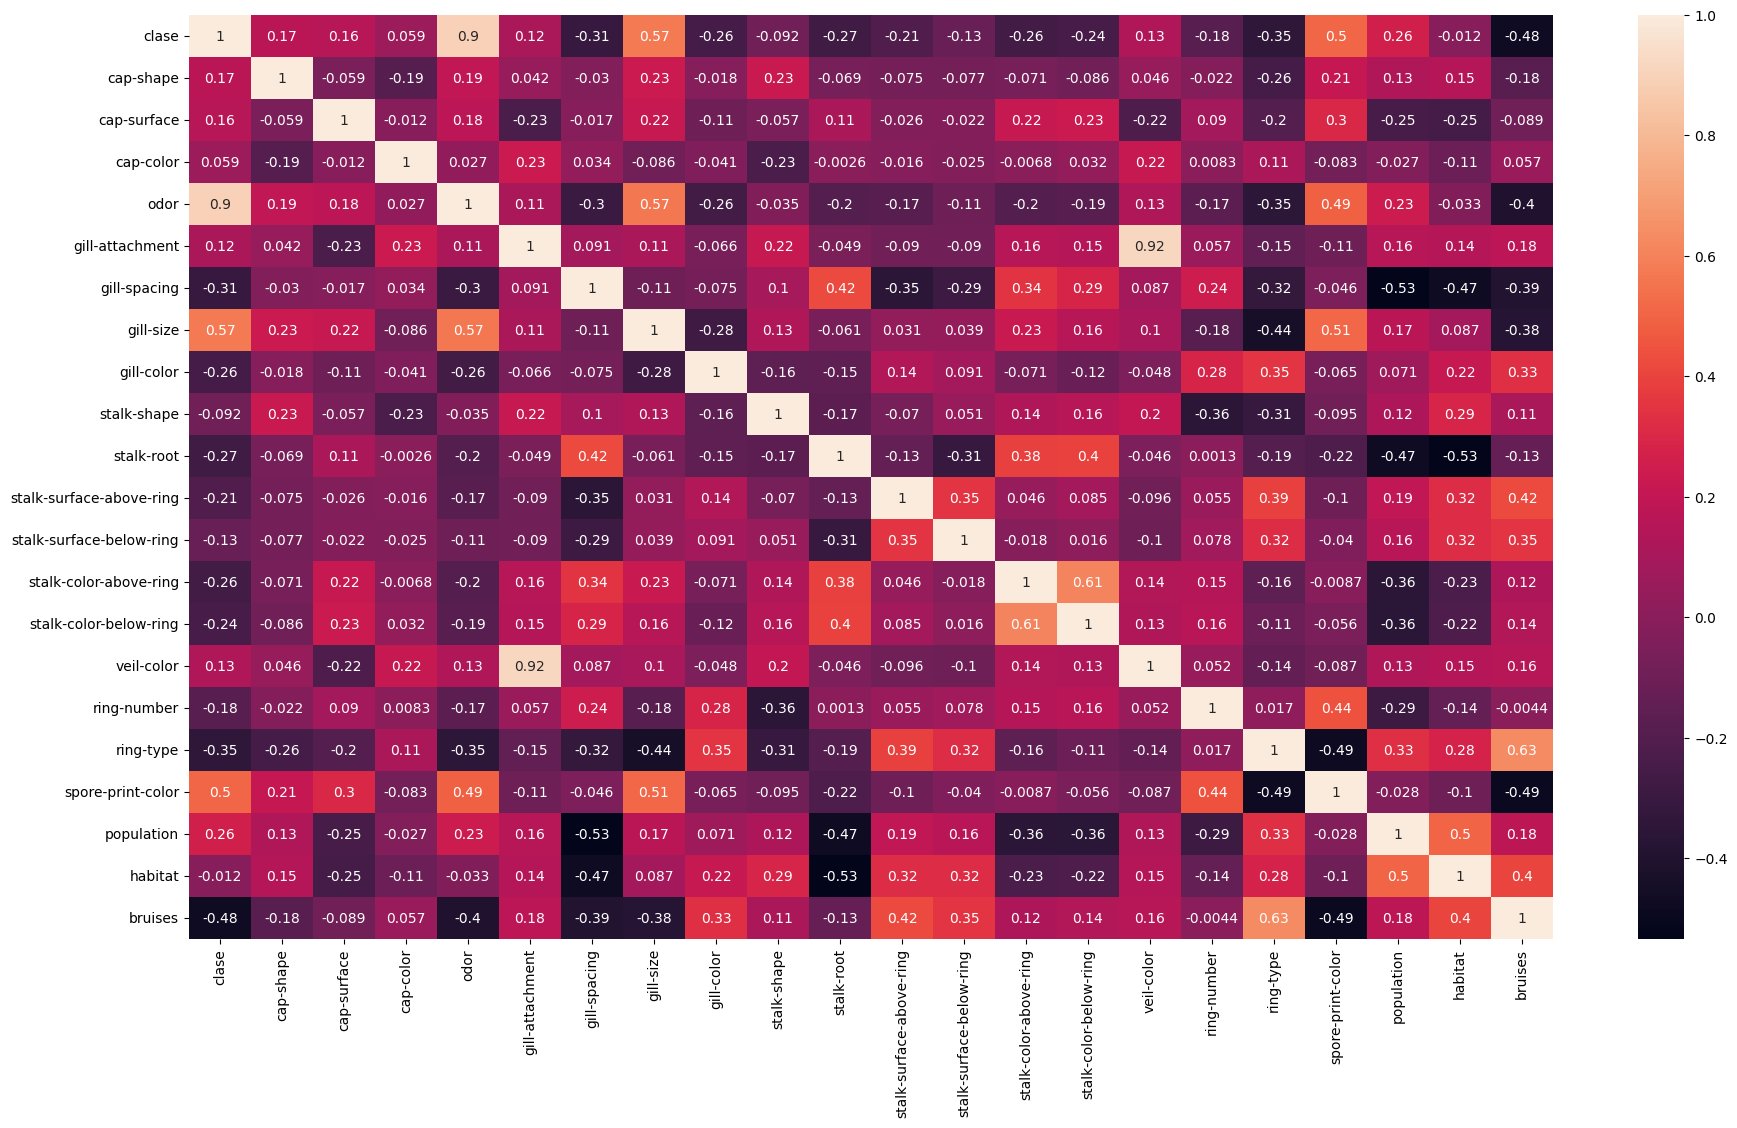

In [4]:
plt.figure(figsize=(22,12))

df_corr = df_encoded.corr()

sns.heatmap(df_corr,annot=True);

In [5]:
df_encoded['clase'].value_counts(normalize=True)

clase
0    0.645231
1    0.354769
Name: proportion, dtype: float64

In [6]:
X = df_encoded.drop(columns=['clase','odor','stalk-root','ring-number'])
y = df_encoded['clase']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [8]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       628
           1       1.00      0.99      1.00       293

    accuracy                           1.00       921
   macro avg       1.00      1.00      1.00       921
weighted avg       1.00      1.00      1.00       921

[[628   0]
 [  2 291]]


In [9]:
y_train_pred = xgb.predict(X_train)
print("Classification Report (Entrenamiento):")
print(classification_report(y_train, y_train_pred))

Classification Report (Entrenamiento):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2342
           1       1.00      1.00      1.00      1340

    accuracy                           1.00      3682
   macro avg       1.00      1.00      1.00      3682
weighted avg       1.00      1.00      1.00      3682



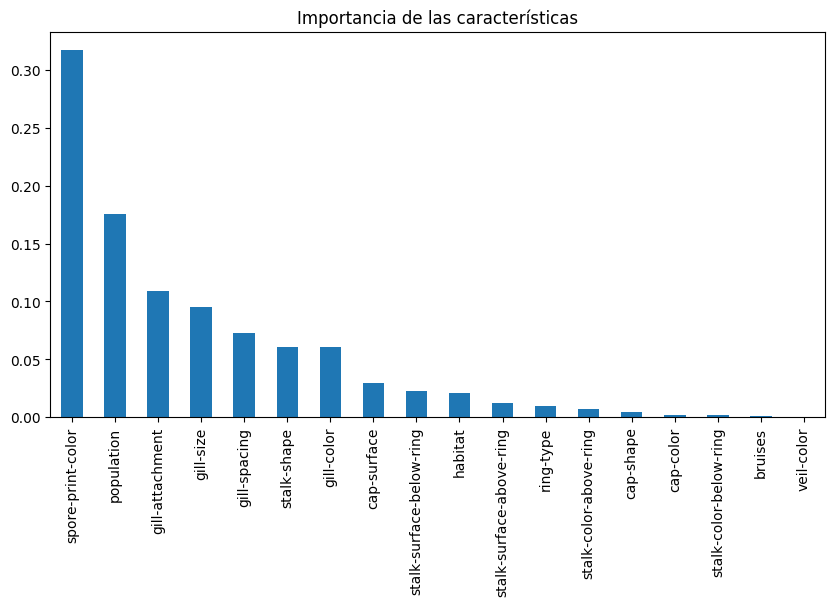

In [10]:
# Obtener la importancia de las características
feature_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Importancia de las características")
plt.show()

In [11]:
rf = RandomForestClassifier(random_state=42,criterion='gini',max_depth=None,min_samples_leaf=1,n_estimators=50)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       628
           1       1.00      0.99      1.00       293

    accuracy                           1.00       921
   macro avg       1.00      1.00      1.00       921
weighted avg       1.00      1.00      1.00       921

[[628   0]
 [  2 291]]


In [12]:
test = pd.read_csv('data/test_setas_.csv')

In [13]:
test['odor'].fillna(0, inplace=True)
test['ring-number'].fillna(test['ring-number'].mode()[0], inplace=True)
test['ring-type'].fillna(test['ring-type'].mode()[0], inplace=True)
test['stalk-root'].fillna(0, inplace=True)

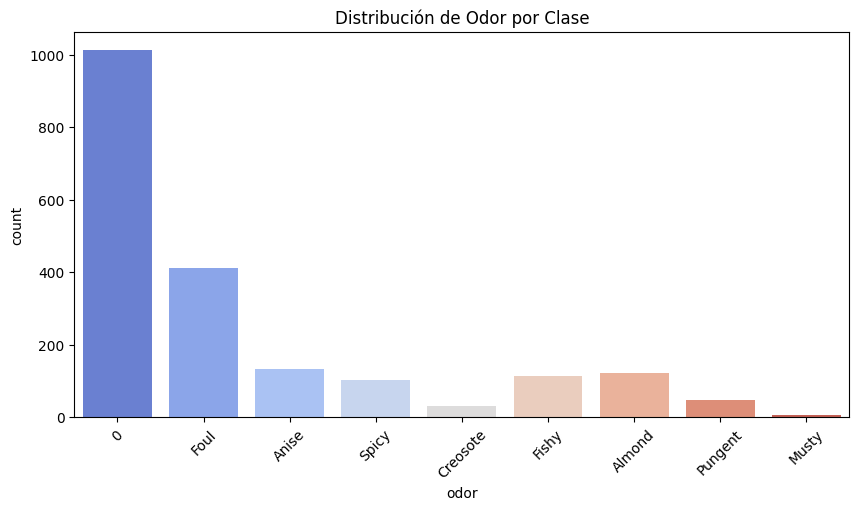

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data=test, x='odor', palette='coolwarm')
plt.title('Distribución de Odor por Clase')
plt.xticks(rotation=45)
plt.show()

In [15]:
test.drop(columns=['id','veil-type','odor','stalk-root','ring-number'],inplace=True)

In [17]:
df = test.copy()

encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

df.head()

,cap-shape,cap-surface,cap-color,bruises,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-type,spore-print-color,population,habitat
0,2,0,0,1,1,1,0,3,1,3,3,7,7,2,0,1,0,0
1,1,2,6,1,1,0,1,2,1,3,2,7,7,2,0,7,4,3
2,2,2,6,0,1,0,0,10,1,3,3,3,7,2,3,1,5,6
3,1,0,3,1,1,0,0,4,0,2,2,0,1,2,2,3,5,3
4,1,2,3,0,1,0,0,8,1,3,3,3,7,2,3,0,5,6


In [18]:
X_train.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'bruises'],
      dtype='object')

In [19]:
df = df[['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'bruises']]

In [20]:
# 🔹 5. Hacer predicciones
test_pred = rf.predict(df)

In [22]:
sub = pd.read_csv('data/sample_submission (3).csv')

In [25]:
sub['class'] = test_pred
sub

,id,class
0,1483,0
1,5111,1
2,3569,0
3,2426,1
4,2749,0
...,...,...
1969,2090,0
1970,2536,0
1971,1215,0
1972,1896,0
